# Evaluate all embeddings generated with parameter_search

In [2]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import datetime
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from evaluation_functions import nn, sil

In [4]:
wd = os.getcwd()


DF = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "processed", "df_focal_reduced.pkl")
OUT_COORDS = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "interim", "parameter_search", "grid_search_umap_params")
OUT_EVALS = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "interim", "parameter_search", "grid_search_umap_params_evals")
FIGURES = os.path.join(os.path.sep, str(Path(wd).parents[0]), "reports", "figures", "grid_search_umap_params")

if (not os.path.isdir(OUT_COORDS)):
    print("Folder with UMAP coordinates doesn't exist: Missing ", OUT_COORDS)
    
for d in [OUT_EVALS, FIGURES]:
    if (not os.path.isdir(d)):
        os.mkdir(d)

In [5]:
spec_df = pd.read_pickle(DF)
print(spec_df.shape)

labels = spec_df.call_lable.values
labeltypes = sorted(list(set(labels)))

(6430, 34)


In [6]:
#outname = os.path.join(os.path.sep, OUT_EVALS, 'eval_table_5.csv')
#eval_table = pd.read_csv(outname, sep=";")
#already_evaluated = [x+'.csv' for x in eval_table[params].astype(str).agg('_'.join, axis=1)]
#not_evaluated = list(set(all_embedding_files) - set(already_evaluated))

In [7]:
params = ['preprocess_type', 'metric_type', 'duration_method','min_dist', 'spread', 'n_neighbors', 'n_comps', 'input_type', 'denoised', 'n_mels', 'f_unit', 'bp_filtered', 'n_repeat']

In [8]:
all_embedding_files = list(sorted(os.listdir(OUT_COORDS)))
print(len(all_embedding_files))

1782


In [7]:
#outname = os.path.join(os.path.sep, OUT_EVALS, 'eval_table_5.csv')
#eval_table = pd.read_csv(outname, sep=";")
#already_evaluated = [x+'.csv' for x in eval_table[params].astype(str).agg('_'.join, axis=1)]
#not_evaluated = list(set(all_embedding_files) - set(already_evaluated))

#print(len(not_evaluated))
#if (len(not_evaluated)>0):
#    old_eval_table = eval_table.copy()
#    all_embedding_files = not_evaluated

In [9]:
eval_colnames = params+ ['S_total'] + ['S_'+x for x in labeltypes] + ['Snorm_total'] + ['Snorm_'+x for x in labeltypes] + ['SIL_total'] + ['SIL_'+x for x in labeltypes]+['knncc_'+x for x in labeltypes] + ['knn-acc_'+x for x in labeltypes]
print(eval_colnames)

eval_table = np.zeros((len(all_embedding_files), len(eval_colnames)))
eval_table = pd.DataFrame(eval_table, columns=eval_colnames)

['preprocess_type', 'metric_type', 'duration_method', 'min_dist', 'spread', 'n_neighbors', 'n_comps', 'input_type', 'denoised', 'n_mels', 'f_unit', 'bp_filtered', 'n_repeat', 'S_total', 'S_agg', 'S_al', 'S_cc', 'S_ld', 'S_mo', 'S_sn', 'S_soc', 'Snorm_total', 'Snorm_agg', 'Snorm_al', 'Snorm_cc', 'Snorm_ld', 'Snorm_mo', 'Snorm_sn', 'Snorm_soc', 'SIL_total', 'SIL_agg', 'SIL_al', 'SIL_cc', 'SIL_ld', 'SIL_mo', 'SIL_sn', 'SIL_soc', 'knncc_agg', 'knncc_al', 'knncc_cc', 'knncc_ld', 'knncc_mo', 'knncc_sn', 'knncc_soc', 'knn-acc_agg', 'knn-acc_al', 'knn-acc_cc', 'knn-acc_ld', 'knn-acc_mo', 'knn-acc_sn', 'knn-acc_soc']


In [10]:
k=5

for i,embedding_file in enumerate(all_embedding_files):
    embedding = np.loadtxt(os.path.join(os.path.sep, OUT_COORDS, embedding_file),delimiter=";")
    
    embedding_params_string = embedding_file.replace('.csv', '')
    embedding_params_list = embedding_params_string.split('_')
    
    nn_stats = nn(embedding, labels, k=k)
    sil_stats = sil(embedding, labels)

    eval_vector = embedding_params_list + [nn_stats.get_S()] + list(nn_stats.get_ownclass_S()) + [nn_stats.get_Snorm()] + list(nn_stats.get_ownclass_Snorm()) + [sil_stats.get_avrg_score()] + list(sil_stats.get_score_per_class()) + list(nn_stats.knn_cc()) + list(nn_stats.knn_accuracy())
    eval_table.loc[i,:] = eval_vector

In [17]:
#if (len(not_evaluated)>0):
#    eval_table = pd.concat([old_eval_table, eval_table])

In [11]:
eval_table

,preprocess_type,metric_type,duration_method,min_dist,spread,n_neighbors,n_comps,input_type,denoised,n_mels,...,knncc_mo,knncc_sn,knncc_soc,knn-acc_agg,knn-acc_al,knn-acc_cc,knn-acc_ld,knn-acc_mo,knn-acc_sn,knn-acc_soc
0,zs,euclidean,pad,0.001,0.1,100,10,specs,no,40,...,0.000000,0.161725,0.259965,0.266667,0.464396,12.254570,0.000000,0.658762,17.681941,6.065858
1,zs,euclidean,pad,0.001,0.1,100,2,specs,no,40,...,0.000000,0.377358,0.173310,0.533333,0.619195,11.712932,0.000000,0.658762,18.760108,6.065858
2,zs,euclidean,pad,0.001,0.1,100,3,specs,no,40,...,0.000000,0.323450,0.606586,0.000000,0.000000,11.983751,1.219512,0.395257,18.274933,8.318891
3,zs,euclidean,pad,0.001,0.1,100,4,specs,no,40,...,0.000000,0.161725,0.346620,0.266667,0.464396,10.358835,0.000000,0.263505,18.652291,6.932409
4,zs,euclidean,pad,0.001,0.1,100,5,specs,no,40,...,0.000000,0.161725,0.173310,0.266667,0.309598,11.509817,0.000000,0.131752,17.466307,6.845754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,zs,euclidean,pad,1,1.5,5,5,specs,no,40,...,41.370224,81.078167,33.362218,48.266667,69.504644,82.667569,12.804878,78.919631,94.285714,63.084922
1778,zs,euclidean,pad,1,1.5,5,6,specs,no,40,...,42.555995,81.347709,33.102253,47.733333,71.207430,82.870684,11.585366,79.314888,94.123989,64.038128
1779,zs,euclidean,pad,1,1.5,5,7,specs,no,40,...,43.083004,81.563342,33.448873,48.800000,70.433437,82.938389,9.756098,80.237154,94.177898,64.298094
1780,zs,euclidean,pad,1,1.5,5,8,specs,no,40,...,44.664032,81.725067,33.882149,48.266667,71.517028,83.886256,12.195122,79.710145,94.339623,64.818024


In [12]:
eval_table['knncc_total'] = eval_table[['knncc_'+x for x in labeltypes]].mean(axis=1)
eval_table['knn-acc_total'] = eval_table[['knn-acc_'+x for x in labeltypes]].mean(axis=1)

In [13]:
outname = os.path.join(os.path.sep, OUT_EVALS, 'eval_table_umap_'+str(k)+'.csv')
print(outname)
eval_table.to_csv(outname, sep=";",  index=False)

/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/data/interim/parameter_search/grid_search_umap_params_evals/eval_table_umap_5.csv


## Plot results

In [17]:
k=5

In [24]:
outname = os.path.join(os.path.sep, OUT_EVALS, 'eval_table_umap_'+str(k)+'.csv')
eval_table = pd.read_csv(outname, sep=";")

In [14]:
eval_table["min_dist"] = pd.to_numeric(eval_table["min_dist"])
eval_table["n_neighbors"] = pd.to_numeric(eval_table["n_neighbors"])
eval_table["spread"] = pd.to_numeric(eval_table["spread"])
eval_table["n_comps"] = pd.to_numeric(eval_table["n_comps"])
eval_table["n_mels"] = pd.to_numeric(eval_table["n_mels"])
eval_table["n_repeat"] = pd.to_numeric(eval_table["n_repeat"])

In [15]:
eval_table

,preprocess_type,metric_type,duration_method,min_dist,spread,n_neighbors,n_comps,input_type,denoised,n_mels,...,knncc_soc,knn-acc_agg,knn-acc_al,knn-acc_cc,knn-acc_ld,knn-acc_mo,knn-acc_sn,knn-acc_soc,knncc_total,knn-acc_total
0,zs,euclidean,pad,0.001,0.1,100,10,specs,no,40,...,0.259965,0.266667,0.464396,12.254570,0.000000,0.658762,17.681941,6.065858,0.137618,5.341742
1,zs,euclidean,pad,0.001,0.1,100,2,specs,no,40,...,0.173310,0.533333,0.619195,11.712932,0.000000,0.658762,18.760108,6.065858,0.156044,5.478598
2,zs,euclidean,pad,0.001,0.1,100,3,specs,no,40,...,0.606586,0.000000,0.000000,11.983751,1.219512,0.395257,18.274933,8.318891,0.200567,5.741763
3,zs,euclidean,pad,0.001,0.1,100,4,specs,no,40,...,0.346620,0.266667,0.464396,10.358835,0.000000,0.263505,18.652291,6.932409,0.149998,5.276872
4,zs,euclidean,pad,0.001,0.1,100,5,specs,no,40,...,0.173310,0.266667,0.309598,11.509817,0.000000,0.131752,17.466307,6.845754,0.125239,5.218556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,zs,euclidean,pad,1.000,1.5,5,5,specs,no,40,...,33.362218,48.266667,69.504644,82.667569,12.804878,78.919631,94.285714,63.084922,36.510616,64.219146
1778,zs,euclidean,pad,1.000,1.5,5,6,specs,no,40,...,33.102253,47.733333,71.207430,82.870684,11.585366,79.314888,94.123989,64.038128,36.702327,64.410546
1779,zs,euclidean,pad,1.000,1.5,5,7,specs,no,40,...,33.448873,48.800000,70.433437,82.938389,9.756098,80.237154,94.177898,64.298094,37.373353,64.377295
1780,zs,euclidean,pad,1.000,1.5,5,8,specs,no,40,...,33.882149,48.266667,71.517028,83.886256,12.195122,79.710145,94.339623,64.818024,38.226647,64.961838


In [16]:
calltypes = sorted(list(set(spec_df.call_lable)))
pal = sns.color_palette("Set2", n_colors=len(calltypes))

In [17]:
params = ['preprocess_type', 'metric_type', 'duration_method','min_dist', 'spread', 'n_neighbors', 'n_comps', 'input_type','denoised', 'n_mels', 'f_unit', 'bp_filtered', 'n_repeat']
p_default = dict(zip(params[:-1], ['zs', 'euclidean', 'pad', 0.0, 1.0, 15, 3, 'melspecs', 'no', 40, 'dB', 'no']))

denoised


(30.0, 70.0)

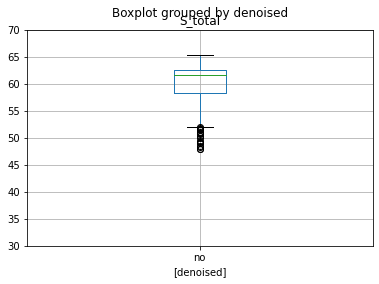

In [20]:
param = 'denoised'
print(param)
outvar="S_total"
other_params = set(params).difference([param, 'n_repeat'])

df = eval_table
boxplot = df[[param]+[outvar]].boxplot(by=param)
plt.ylim(30,70)

In [18]:
print(np.min(eval_table.S_total))
print(np.max(eval_table.S_total))
print(np.min(eval_table.SIL_total))
print(np.max(eval_table.SIL_total))
print(np.min(eval_table.knncc_total))
print(np.max(eval_table.knncc_total))

14.775984174761033
65.29606560828938
-0.2761643159611259
0.20496465562856842
0.02901634587484283
39.58018686906258


In [19]:
y_lower_dict = {"SIL":-0.65,
                "SIL_total": -0.3,
                "S":0,
                "S_total": 30,
                "knncc":0,
                "knncc_total": 10,
                "knn-acc": 0,
                "knn-acc_total": 30}
y_upper_dict = {"SIL":0.65,
                "SIL_total": 0.3,
                "S":100,
                "S_total": 70,
                "knncc":100,
                "knncc_total": 45,
                "knn-acc": 100,
                "knn-acc_total": 70}

In [40]:
# BOXPLOTS

for outvar in ['S_total', 'SIL_total']:
    for param in params[:-1]:
        other_params = set(params).difference([param, 'n_repeat'])
        boxplot = df[[param]+[outvar]].boxplot(by=param)

        plt.ylim(y_lower_dict[outvar], y_upper_dict[outvar])
        plt.suptitle('')
        plt.title('')
        plt.xlabel(param)
             
        plt.savefig(os.path.join(os.path.sep, FIGURES,'box_'+outvar+'_'+param+'.jpg'))
        plt.close()

In [43]:
# LINE PLOTS

for out_v in ["SIL", "S", "knncc", "knn-acc"]:
    outvars = [out_v+'_'+x for x in calltypes]
    #outvars = [out_v+'_total']+outvars
    
    for param in params[:-1]:
        other_params = set(params).difference([param, 'n_repeat'])

        df = eval_table

        #print(df.shape)
        means = df[[param, out_v+'_total']]
        df = df[[param]+outvars]

        melted = pd.melt(df, id_vars=param, value_vars=outvars)
        melted = melted.sort_values(by=param)

        sns.lineplot(x=param, y="value", hue="variable", data=melted, palette="Set2", hue_order=outvars, err_style='band')
        sns.lineplot(x=param, y=out_v+'_total', data=means, color='black')
        plt.ylabel(out_v)
        plt.ylim(y_lower_dict[out_v], y_upper_dict[out_v])
        
        lg = plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
        plt.savefig(os.path.join(os.path.sep, FIGURES,'line_'+out_v+'_'+param+'.jpg'), bbox_extra_artists=(lg,), bbox_inches='tight')
        plt.close()

In [44]:
# Lineplots with error bars

for out_v in ["SIL", "S", "knncc", "knn-acc"]:
    outvars = [out_v+'_'+x for x in calltypes]
    color_dict = dict(zip(outvars, pal))

    for param in params[:-1]:
        other_params = set(params).difference([param, 'n_repeat'])

        df = eval_table
        #print(df.shape)
        means = df[[param, out_v+'_total']]
        df = df[[param]+outvars]
        
        levels = sorted(list(set(df[param])))
        mean_df = df.groupby([param]).mean()
        std_df = df.groupby([param]).std()

        fig, ax = plt.subplots(figsize=(7, 4))

        for outvar in outvars:
            y = mean_df[outvar].values
            yerr = std_df[outvar].values
            ax.errorbar(levels, y, yerr=yerr,color=color_dict[outvar]) # linestype=ls

        ax.set_ylim(y_lower_dict[out_v], y_upper_dict[out_v])
        ax.set_title(param)
        plt.savefig(os.path.join(os.path.sep, FIGURES,'err_'+out_v+'_'+param+'.jpg'))
        plt.close()

In [45]:
# Lineplots with error bars with Mean (?)

for out_v in ["SIL", "S", "knncc", "knn-acc"]:
#for out_v in ["S"]:
    outvars = [out_v+'_'+x for x in calltypes]
    color_dict = dict(zip(outvars, pal))
    
    outvars = [out_v+'_total']+outvars
    color_dict[out_v+'_total'] = "black"
    #for param in params[0:2]:
    for param in params[:-1]:
        other_params = set(params).difference([param, 'n_repeat'])

        df = eval_table
        #print(df.shape)
        means = df[[param, out_v+'_total']]
        df = df[[param]+outvars]
        
        levels = sorted(list(set(df[param])))
        mean_df = df.groupby([param]).mean()
        std_df = df.groupby([param]).std()

        fig, ax = plt.subplots(figsize=(7, 4))

        for outvar in outvars:
            y = mean_df[outvar].values
            yerr = std_df[outvar].values
            ax.errorbar(levels, y, yerr=yerr,color=color_dict[outvar]) # linestype=ls

        ax.set_ylim(y_lower_dict[out_v], y_upper_dict[out_v])
        ax.set_title(param)
        plt.savefig(os.path.join(os.path.sep, FIGURES,'errmean_'+out_v+'_'+param+'.jpg'))
        plt.close()

In [ ]:
#df = df.groupby([param]).mean()

In [269]:
eval_table.head(5)

,preprocess_type,metric_type,duration_method,min_dist,spread,n_neighbors,n_comps,input_type,denoised,n_mels,...,SIL_sn,SIL_soc,knncc_agg,knncc_al,knncc_cc,knncc_ld,knncc_mo,knncc_sn,knncc_soc,knncc_total
0,no,euclidean,pad,0.0,1.0,15,5,melspecs,no,40,...,0.394241,-0.415412,4.266667,35.448916,19.566689,0.0,15.415020,79.083558,23.223570,25.286346
1,no,euclidean,pad,0.0,1.0,15,5,melspecs,no,40,...,0.399913,-0.419289,3.466667,36.687307,22.613406,0.0,16.732543,79.838275,22.963605,26.043114
2,no,euclidean,pad,0.0,1.0,15,5,melspecs,no,40,...,0.389978,-0.408692,6.933333,35.139319,20.379147,0.0,12.516469,77.088949,21.923744,24.854423
3,no,euclidean,pad,0.0,1.0,15,5,melspecs,no,40,...,0.396846,-0.416409,5.066667,35.913313,19.702099,0.0,13.570487,77.735849,22.530329,24.931249
4,no,euclidean,pad,0.0,1.0,15,5,melspecs,no,40,...,0.396419,-0.413416,4.800000,35.603715,22.410291,0.0,16.864295,78.921833,22.357019,25.851022


In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [34]:
print(np.min(eval_table.S_total))
print(np.max(eval_table.S_total))

31.73234531400153
66.38407436981849


In [35]:
plot_params = ['spread', 'n_neighbors', 'min_dist', 'n_comps']

In [36]:
outvar = 'S_total'

for i, param in enumerate(plot_params):
    print(param)
    other_params = set(params).difference([param, 'n_repeat'])
    df = eval_table
    #for p in other_params:
    #    df = df.loc[df[p]==p_default[p],:]
        
    levels = sorted(list(set(df[param])))
    print(levels)
    # STATS
    mod = ols(outvar+'~'+param, data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table)
    #print(mod.summary())

preprocess_type
['no', 'zs', 'zs-fl-ce']
                        sum_sq      df           F        PR(>F)
preprocess_type    9682.303413     2.0  161.443067  9.403304e-68
Residual         103544.222716  3453.0         NaN           NaN
metric_type
['correlation', 'cosine', 'euclidean', 'manhattan']
                    sum_sq      df          F        PR(>F)
metric_type    1904.105419     3.0  19.681486  1.197263e-12
Residual     111322.420710  3452.0        NaN           NaN
duration_method
['overlap', 'pad', 'pw-pad', 'stretched', 'tshift-overlap', 'tshift-pad']
                        sum_sq      df          F        PR(>F)
duration_method    3908.982956     5.0  24.673059  1.694735e-24
Residual         109317.543173  3450.0        NaN           NaN
denoised
['no', 'yes']
                 sum_sq      df          F    PR(>F)
denoised     419.598082     1.0  12.847542  0.000343
Residual  112806.928047  3454.0        NaN       NaN
n_mels
[0, 10, 20, 30, 40, 50]
                 sum_sq  

# S_total and SIL_total

In [21]:
eval_table

,preprocess_type,metric_type,duration_method,min_dist,spread,n_neighbors,n_comps,input_type,denoised,n_mels,...,knncc_soc,knn-acc_agg,knn-acc_al,knn-acc_cc,knn-acc_ld,knn-acc_mo,knn-acc_sn,knn-acc_soc,knncc_total,knn-acc_total
0,zs,euclidean,pad,0.001,0.1,100,10,specs,no,40,...,0.259965,0.266667,0.464396,12.254570,0.000000,0.658762,17.681941,6.065858,0.137618,5.341742
1,zs,euclidean,pad,0.001,0.1,100,2,specs,no,40,...,0.173310,0.533333,0.619195,11.712932,0.000000,0.658762,18.760108,6.065858,0.156044,5.478598
2,zs,euclidean,pad,0.001,0.1,100,3,specs,no,40,...,0.606586,0.000000,0.000000,11.983751,1.219512,0.395257,18.274933,8.318891,0.200567,5.741763
3,zs,euclidean,pad,0.001,0.1,100,4,specs,no,40,...,0.346620,0.266667,0.464396,10.358835,0.000000,0.263505,18.652291,6.932409,0.149998,5.276872
4,zs,euclidean,pad,0.001,0.1,100,5,specs,no,40,...,0.173310,0.266667,0.309598,11.509817,0.000000,0.131752,17.466307,6.845754,0.125239,5.218556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,zs,euclidean,pad,1.000,1.5,5,5,specs,no,40,...,33.362218,48.266667,69.504644,82.667569,12.804878,78.919631,94.285714,63.084922,36.510616,64.219146
1778,zs,euclidean,pad,1.000,1.5,5,6,specs,no,40,...,33.102253,47.733333,71.207430,82.870684,11.585366,79.314888,94.123989,64.038128,36.702327,64.410546
1779,zs,euclidean,pad,1.000,1.5,5,7,specs,no,40,...,33.448873,48.800000,70.433437,82.938389,9.756098,80.237154,94.177898,64.298094,37.373353,64.377295
1780,zs,euclidean,pad,1.000,1.5,5,8,specs,no,40,...,33.882149,48.266667,71.517028,83.886256,12.195122,79.710145,94.339623,64.818024,38.226647,64.961838


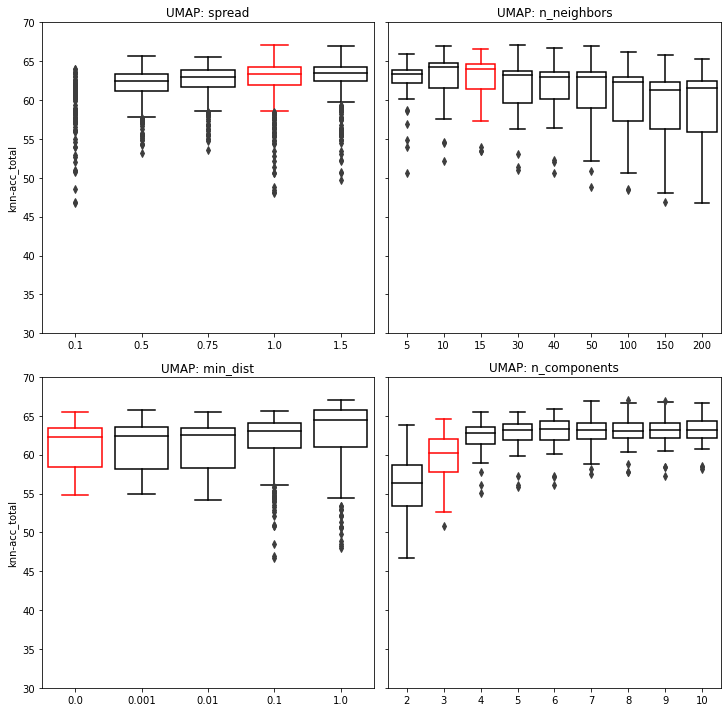

In [22]:
# BOXPLOTS
plot_params = ['spread', 'n_neighbors', 'min_dist', 'n_comps']

title_dict = dict(zip(plot_params, ['UMAP: spread', 
                                    'UMAP: n_neighbors',                                  
                                    'UMAP: min_dist',
                                    'UMAP: n_components' 
                                   ]))
n_rows = 2
n_cols = 2

cs = list(range(0,n_cols)) * n_rows
rs_list = [[x]*n_cols for x in list(range(0,n_rows))]
rs = list()
for x in rs_list:
    for y in x:
        rs.append(y)



#fig.suptitle('Effect of different run parameters')
for outvar in ['knn-acc_total']:
#for outvar in ['S_total', 'SIL_total', 'knncc_total', "knn-acc_total"]:
#for outvar in ['S_total']:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10), sharey=True)
    for i,param in enumerate(plot_params):
        #print(param)
        other_params = set(params).difference([param, 'n_repeat'])
        
        df = eval_table
        #for p in other_params:
        #    df = df.loc[df[p]==p_default[p],:]
        #print(df.shape)
        #print(levels)
        
        levels = sorted(list(set(df[param])))
        #color_dict = {level: "red" if level == p_default[param] else "white" for level in levels}
        
        ax = sns.boxplot(ax=axes[rs[i], cs[i]], data=df, x=param, y=outvar, order=levels)#, palette = color_dict)
        
        for b,box in enumerate(ax.artists):
            if b==levels.index(p_default[param]):
                col = "red"
            else:
                col="black"
            box.set_edgecolor(col)
            box.set_facecolor("white")#

        # iterate over whiskers and median lines
            for j in range(6*b,6*(b+1)):
                ax.lines[j].set_color(col)
            
            
        ax.set_ylim(y_lower_dict[outvar], y_upper_dict[outvar])
        ax.set_title(title_dict[param])
        ax.set_xlabel('')
        ax.set_ylabel('')

    plt.tight_layout()
    plt.setp(axes[:, 0], ylabel=outvar)
    #fig.delaxes(ax= axes[1,3]) 
    #fig.delaxes(ax= axes[2,3]) 
    plt.savefig(os.path.join(os.path.sep, FIGURES,'box_'+outvar+'_all.jpg'), bbox_inches='tight')
    #plt.close()